In [ ]:
# 1.gpt2 greedy_search demo 
def greedy_search(model, input_ids, max_steps=10, max_choices=5):
    iterations = []
    input_ids_clone = input_ids.clone()
    with torch.no_grad():
        for _ in range(max_steps):
            iteration = {}
            iteration['input'] = tokenizer.decode(input_ids_clone[0])

            output = model(input_ids=input_ids_clone)
            # output.logits.shape = (1, 7, 50257)
            # last_token_logits.shape == [50257]
            last_token_logits = output.logits[0, -1, :] # [50257]
            last_token_probs = torch.softmax(last_token_logits, dim=-1) # [50257]
            sorted_ids = torch.argsort(last_token_probs, dim=-1, descending=True) 

            for choice_idx in range(max_choices):
                token_id = sorted_ids[choice_idx]
                token_prob = last_token_probs[token_id].cpu().numpy() # 对应位置的概率
                token_choice = f'{tokenizer.decode(token_id)}({100*token_prob:.2f}%)'
                iteration[f'choice {choice_idx+1}'] = token_choice

            # append
#             print('before append input_ids_clone.shape', input_ids_clone.shape)
            input_ids_clone = torch.cat([input_ids_clone, sorted_ids[None, 0, None]], dim=-1)
#             print('after append input_ids_clone.shape', input_ids_clone.shape)

            iterations.append(iteration)
        return iterations
input_ids = model_inputs['input_ids'].to(device)
print(input_ids.shape)
input_ids
pd.DataFrame(greedy_search(model, input_ids, ))

In [10]:
import torch
last_token_probs=torch.tensor([1,3,5,2,3,8])
sorted_ids =  torch.argsort(last_token_probs, dim=-1, descending=True)
sorted_ids[None, 0, None]
sorted_ids[None,0]

tensor([5])

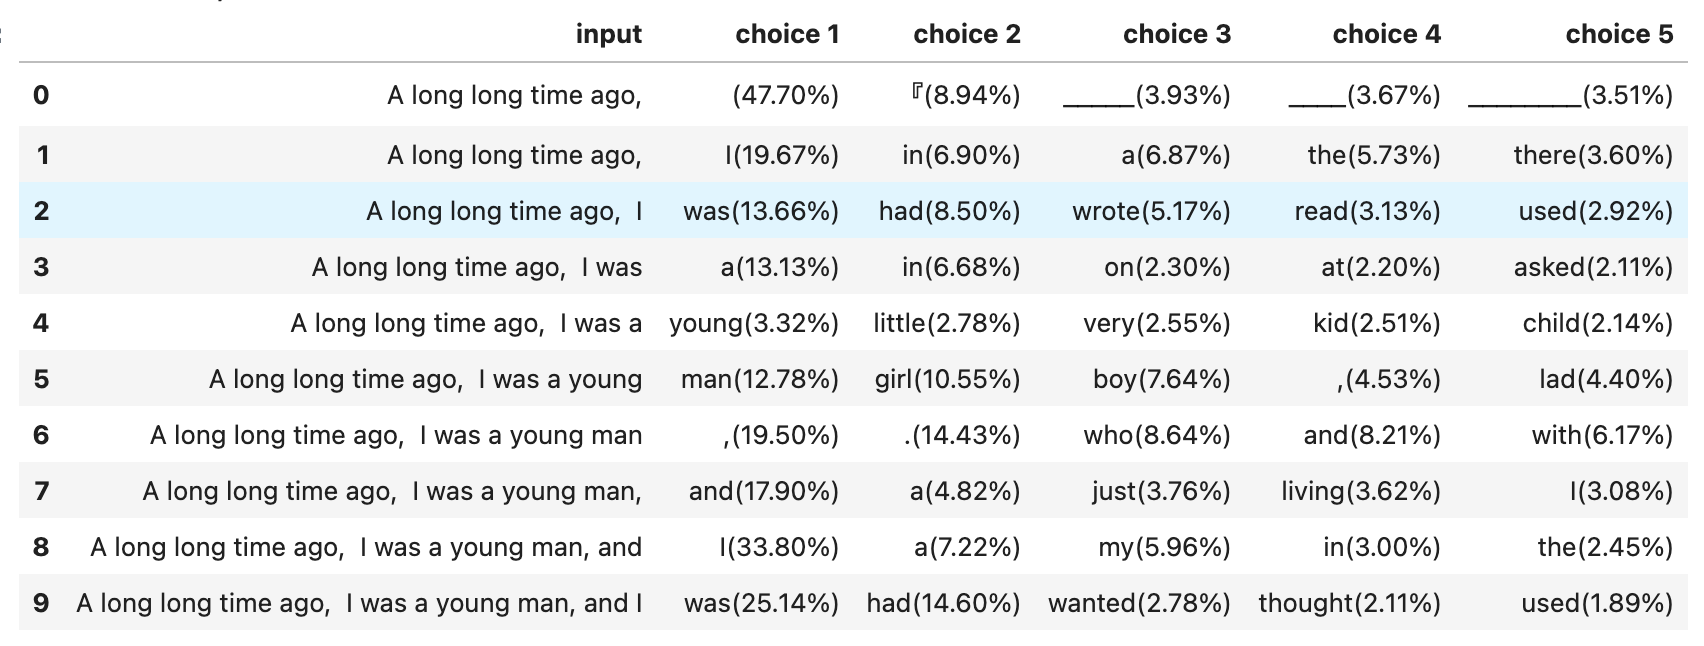